In [7]:
# Import
import torch
import torchvision
import matplotlib.pyplot as plt

In [4]:
# Scarichiamo il dataset Oxford Pet
dataset = torchvision.datasets.OxfordIIITPet(root="./data", split='trainval', download=True)

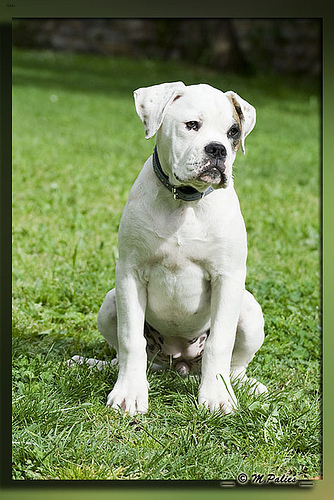

In [14]:
# Esploriamo un po' i dati
img = dataset[70][0]
img

In [15]:
# Le trasformazioni più comuni sono:

# Resize/Crop.
# Normalize.
# Data Augmentation.

In [21]:
# Resize
resize = torchvision.transforms.Resize((128, 128))
# Crop
crop = torchvision.transforms.CenterCrop((128, 128))
# Random Crop
random_crop = torchvision.transforms.RandomCrop((128, 128))

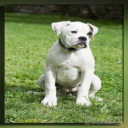

In [23]:
resize(img)

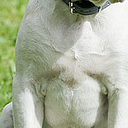

In [24]:
crop(img)

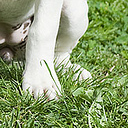

In [25]:
random_crop(img)

In [32]:
# Trasformiamo l'immagine in un tensore di PyTorch
to_tensor = torchvision.transforms.ToTensor()
# Normalizziamo l'immagine
normalize = torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

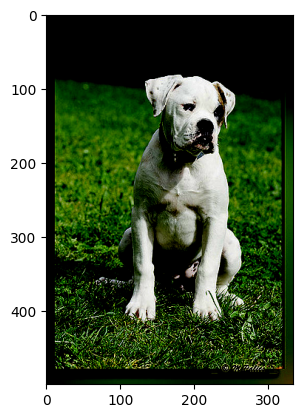

In [36]:
norm_img = normalize(to_tensor(img))
plt.imshow(norm_img.permute(1,2,0))

In [44]:
# Augmentation dei dati
h_flip = torchvision.transforms.RandomHorizontalFlip(p=1) # Flip orizzontale
v_flip = torchvision.transforms.RandomVerticalFlip(p=1) # Flip verticale
rot = torchvision.transforms.RandomRotation(degrees=45) # Rotazione random

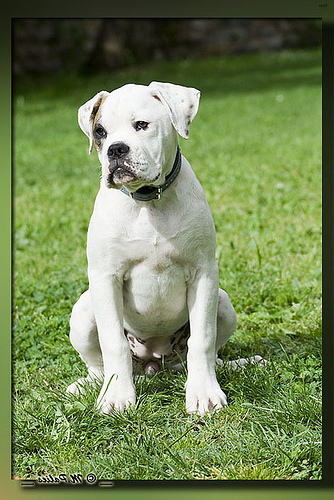

In [40]:
h_flip(img)

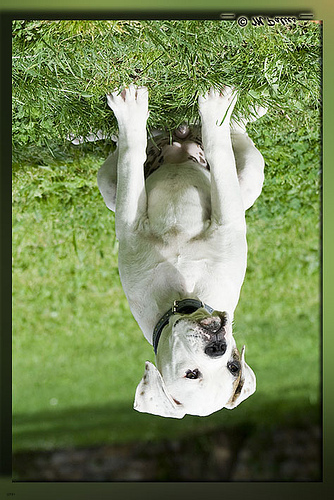

In [42]:
v_flip(img)

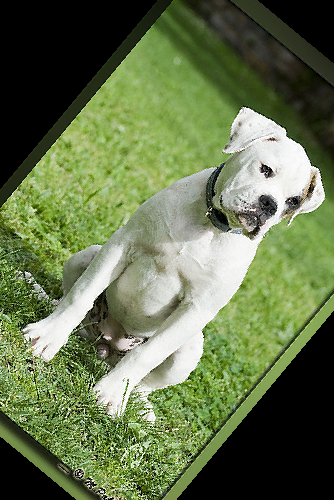

In [45]:
rot(img)

In [56]:
# Le trasformazioni possono essere composte insieme tramite Compose
# e applicate poi al dataset
transforms_composed = torchvision.transforms.Compose([torchvision.transforms.Resize((256, 256)),
                                                      torchvision.transforms.ToTensor(),
                                                      torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = torchvision.datasets.OxfordIIITPet(root="./data", split='trainval', download=True, transform=transforms_composed)


In [59]:
from torchvision.transforms.v2 import MixUp
# CutMix o Mixup vanno usati dopo aver creato il DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=4)

In [63]:
# Creiamo un'istanza della classe MixUp
mixup = MixUp(num_classes=37) # diamo il numero di labels
for images, labels in dataloader:
    print(f"Prima di MixUp: {images.shape = }, {labels.shape = }")
    images, labels = mixup(images, labels)
    print(f"Dopo dopo MixUp: {images.shape = }, {labels.shape = }")
    break

Prima di MixUp: images.shape = torch.Size([4, 3, 256, 256]), labels.shape = torch.Size([4])
Dopo dopo MixUp: images.shape = torch.Size([4, 3, 256, 256]), labels.shape = torch.Size([4, 37])
